# gdTCR dandelion to 10x comparison 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [2]:
sns.set_palette('colorblind')

In [3]:
# set working directory
%cd /lustre/scratch117/cellgen/team205/cs42/VDJ_collab_manuscript/

/lustre/scratch117/cellgen/team205/cs42/VDJ_collab_manuscript


In [4]:
# figure directory
fig_path = '/home/jovyan/mount/gdrive/VDJ_collab/plots_output/chenqu_jhub/'

## Load data from Krzysztof

In [5]:
# complete file from Krzysztof which includes other gdTCR samples, so filter for only panfetal ones
#df = pd.read_csv('csv/contig-counts-23-01-11.csv',index_col=0)
# only include samples from panfetal
#meta = pd.read_csv('metadata/gdTCR_metadata_cleaned_24032022.csv')
#df_panfetal = df[df.index.isin(meta['GDTCR'])]
#df_panfetal.to_csv('metadata/contig-counts-23-01-11-panfetal.csv')

In [7]:
df_panfetal = pd.read_csv('metadata/contig-counts-23-01-11-panfetal.csv',index_col=0)

In [8]:
df_panfetal.shape

(33, 6)

## statistical test and plot

In [9]:
def compare(data, col1, lab1, col2, lab2, productive):
    #if we're to do productive, make a little helper doodad for the plot titling
    #and append to column names
    prod = ""
    if productive:
        col1 = col1+"-productive"
        col2 = col2+"-productive"
        prod = " productive"
    #boxplot
    plt.boxplot([data[col1], data[col2]], labels = [lab1, lab2])
    plt.title("high confidence"+prod+" contig count")
    plt.savefig(fig_path+'gdTCR_'+col1+col2+prod+'_comparison_boxplot.pdf',bbox_inches='tight');
    
    #violin + swarm plot
    delta = data[col1]-data[col2]
    sns.violinplot(y=delta)
    sns.swarmplot(y=delta, color="white", edgecolor="gray")
    plt.title("high confidence"+prod+" contig count difference")
    plt.show()
    #same, but as a fraction of dandelion
    delta = delta/data[col1]
    #kick out nans and super low vals in case they appear
    delta = delta[~np.isnan(delta)]
    #delta[delta < -100] = -100
    sns.violinplot(y = delta)
    sns.swarmplot(y = delta, color="white", edgecolor="gray")
    plt.ylabel(r"$(N_{"+lab1+"}-N_{"+lab2+"})/N_{"+lab1+"}$", fontsize=14)
    plt.title('high confidence'+prod+' contigs')
    plt.savefig(fig_path+'gdTCR_'+col1+col2+prod+'_comparison.pdf',bbox_inches='tight');
    
    #wilcoxon signed-rank test
    test = scipy.stats.wilcoxon(data[col1], data[col2])
    #compute the Z of the test based on the p-value. the test is two-tailed so divide the p-value by 2 for ppf purposes
    #https://stats.stackexchange.com/questions/330129/how-to-get-the-z-score-in-wilcox-test-in-r
    Z = np.abs(scipy.stats.norm.ppf(test[1]/2))
    r = Z/np.sqrt(data.shape[0])
    print([test, r])

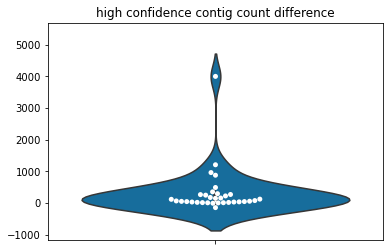

[WilcoxonResult(statistic=26.0, pvalue=5.432238297958553e-06), 0.7915942078430119]


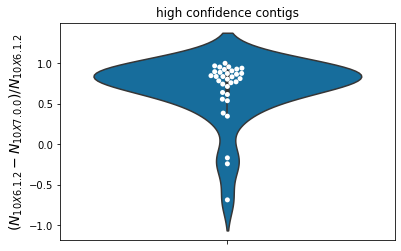

In [11]:
# compare 10X gdhack method to 10X 7.0.0 
compare(
    df_panfetal,
    col1 = "gdhack", lab1 = "10X 6.1.2",
    col2 = "cr7", lab2 = "10X 7.0.0",
    productive=False
)

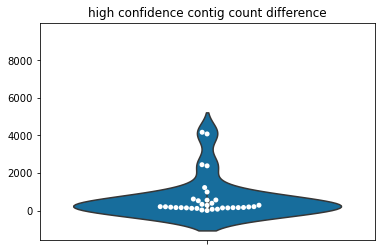

[WilcoxonResult(statistic=0.0, pvalue=5.388790737562247e-07), 0.872464343025402]


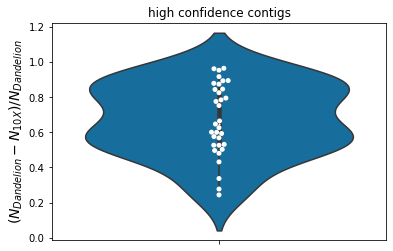

In [14]:
# compare dandelion to 10X gdhack method 
compare(
    df_panfetal,
    col1 = "dandelion", lab1 = "Dandelion",
    col2 = "gdhack", lab2 = "10X",
    productive=False
)